Projekt musi wykorzystywać jakąś sieć neuronową.

proces przetwarzania danych

proces modelowania (znajdowania optymalnych parametrów)

porównanie kilku modeli

wizualizację wyników

podsumowanie pracy

1. age : Wiek pacjenta

2. sex : Płeć pacjenta

3. cp : rodzaj bólu w klatce piersiowej
Value 1: typowa dusznica
Value 2: nietypowa dusznica
Value 3: ból niedławicowy
Value 4: bezobjawowy

4. trtbps : spoczynkowe ciśnienie krwi (w mm Hg)

5. chol : cholesterol w mg/dl pobrany za pomocą czujnika BMI

6. fbs : cukier we krwi na czczo > 120 mg/dl (1 = true; 0 = false)

7. rest_ecg : spoczynkowe wyniki elektrokardiograficzne
Value 0: normalne
Value 1: nieprawidłowości fali ST-T (inversja fali T i/lub podwyższenie fali ST lub spadek > 0.05 mV)
Value 2: prawdopodobny lub obecny przerost lewej komory według kryteriów Estesa

8. thalachh : maksymalne osiągnięte tętno

9. exng: dusznica indukowana wysiłkiem fizycznym (1 = yes; 0 = no)

10. oldpeak: oldpeak - poprzedni pik

11. slp - nachylenie

12. caa: liczba głównych naczyń (0-3)

13. thall - Wynik testu warunków skrajnych talu ~ (0,3)

14. output : 0= niższa szansa na atak serca 1= wyższa szansa na atak serca

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# **Wstępny przegląd danych**

In [120]:
df=pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
print(df.nunique())

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


In [ ]:
df.shape

(303, 14)

## 303 rzędy i 14 kolumn.

# BOX-PLOTY DLA DANYCH I ZLICZENIA



Text(0.5, 0.98, 'Ilość pacjentów w danej kategorii')

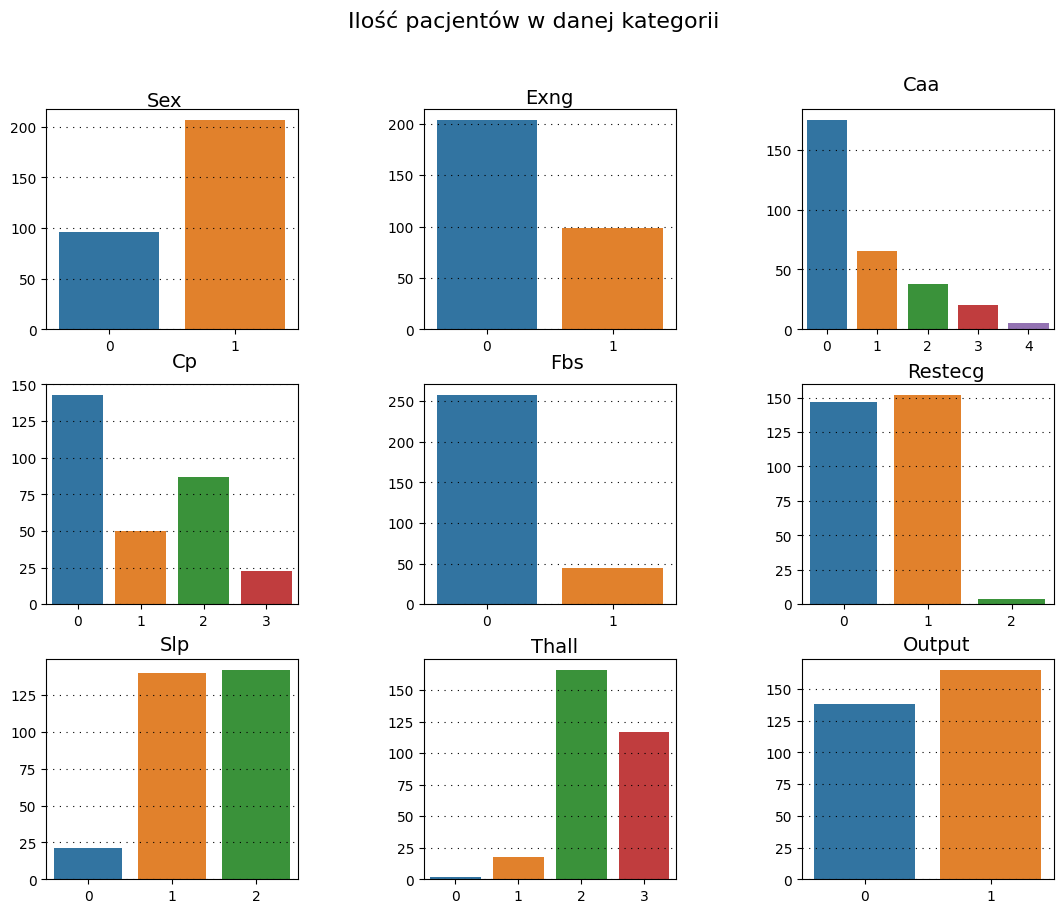

In [ ]:
fig = plt.figure(figsize=(13,10))
gs = fig.add_gridspec(3,3)
gs.update(wspace=0.5, hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])
ax8 = fig.add_subplot(gs[2,1])
ax9 = fig.add_subplot(gs[2,2])

# Sex count
ax1.text(0.3, 220, 'Sex', fontsize=14)
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax1,data=df,x='sex')
ax1.set_xlabel("")
ax1.set_ylabel("")

# Exng count
ax2.text(0.3, 220, 'Exng', fontsize=14)
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax2,data=df,x='exng')
ax2.set_xlabel("")
ax2.set_ylabel("")

# Caa count
ax3.text(1.5, 200, 'Caa', fontsize=14)
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax3,data=df,x='caa')
ax3.set_xlabel("")
ax3.set_ylabel("")

# Cp count
ax4.text(1.5, 162, 'Cp', fontsize=14)
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax4,data=df,x='cp')
ax4.set_xlabel("")
ax4.set_ylabel("")

# Fbs count
ax5.text(0.5, 290, 'Fbs', fontsize=14)
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='fbs')
ax5.set_xlabel("")
ax5.set_ylabel("")

# Restecg count
ax6.text(0.75, 165, 'Restecg', fontsize=14)
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax6,data=df,x='restecg')
ax6.set_xlabel("")
ax6.set_ylabel("")

# Slp count
ax7.text(0.85, 155, 'Slp', fontsize=14)
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax7,data=df,x='slp')
ax7.set_xlabel("")
ax7.set_ylabel("")

# Thall count
ax8.text(1.2, 180, 'Thall', fontsize=14)
ax8.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax8,data=df,x='thall')
ax8.set_xlabel("")
ax8.set_ylabel("")

# Output count
ax9.text(0.3, 180, 'Output', fontsize=14)
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax9,data=df,x='output')
ax9.set_xlabel("")
ax9.set_ylabel("")

fig.suptitle("Ilość pacjentów w danej kategorii", fontsize=16)

Widzimy zliczenia dla kolumn, generalnie dane nie są zbyt dobrze zrównoważone, często w jednej kolumnie jest więcej jednej cechy niż innej.

In [22]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continous_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]

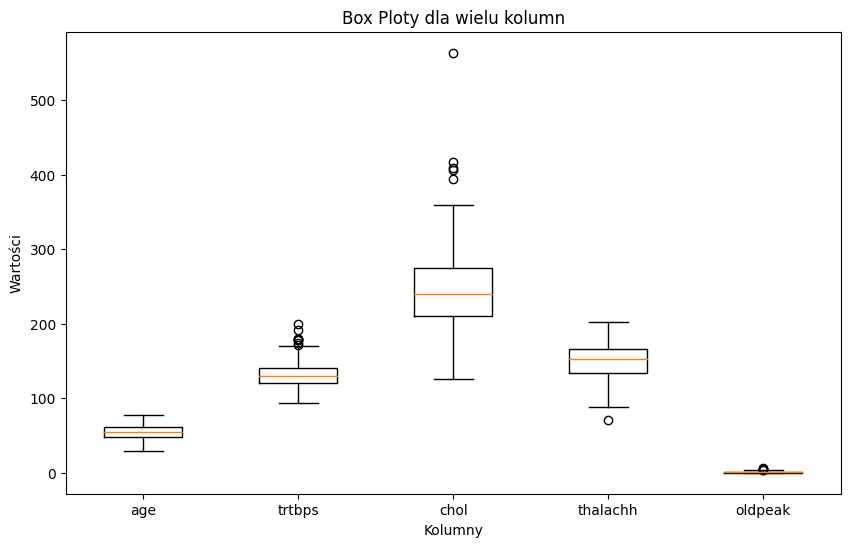

In [ ]:
# Tworzenie box plotów
selected_columns = continous_cols
selected_df = df[selected_columns]
plt.figure(figsize=(10, 6))
plt.boxplot(selected_df, labels=selected_df.columns)
plt.title('Box Ploty dla kolumn')
plt.xlabel('Kolumny')
plt.ylabel('Wartości')

# Wyświetlanie box plotów
plt.show()

Widać w miarę normalny rozkład zmiennych (oprócz oldpeak) oraz niestety obecność obserwacji odstających

# BRAKUJĄCE WARTOŚCI

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Dane nie mają missing values dlatego, w ramach ćwiczenia, dodam kilka brakujących wartości w kolumnie chol.

In [ ]:
df['chol_missing'] = df['chol']  # Tworzenie nowej kolumny
for index, row in df.iterrows():
    if (index + 1) % 3 == 0:  # Czy indeks jest podzielny przez 3
        df.at[index, 'chol_missing'] = np.nan  # Zamiana wartości na brakującą

# Wyświetlanie df z nową kolumną
print(df)

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  chol_missing  
0      0   

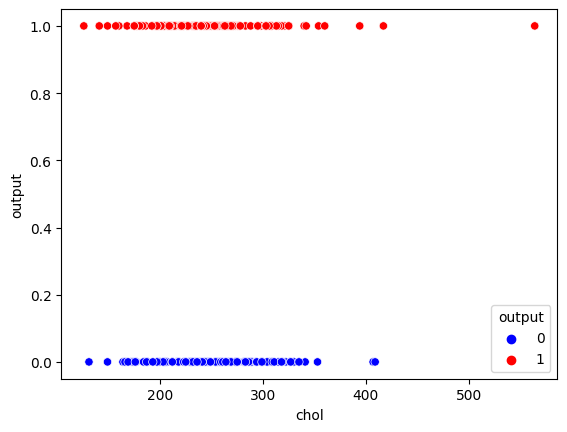

In [ ]:
sns.scatterplot(x='chol', y='output', data=df, hue='output', palette={0: 'blue', 1: 'red'})
plt.show()

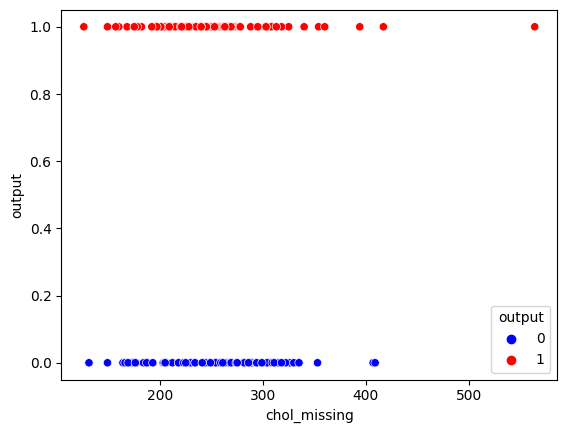

In [ ]:
sns.scatterplot(x='chol_missing', y='output', data=df, hue='output', palette={0: 'blue', 1: 'red'})
plt.show()

Mimo, że aż 1/3 wartości jest nieobecna na wykresie prawie nie da się tego zauważyć! Dodatkowo widać, że poziom cholesterolu nie wpływa bezpośrednio na prawdopodobieństwo wystąpienia ataku serca, co może być zaskakujące.

In [ ]:
df.isnull().sum()

age               0
sex               0
cp                0
trtbps            0
chol              0
fbs               0
restecg           0
thalachh          0
exng              0
oldpeak           0
slp               0
caa               0
thall             0
output            0
chol_missing    101
dtype: int64

In [ ]:
median_chol = df['chol'].median()
df['chol_filled'] = df['chol_missing'].fillna(median_chol)

Wartości brakujące zostały wypełnione medianą.

# KORELACJE W DANYCH

In [122]:
X=df[df["sex"]==1].reset_index()
Y=df[df["sex"]==0].reset_index()

In [123]:
fig=go.Figure()
fig.add_trace(go.Box(y=Y["age"],name="Male",marker_color="blue",boxpoints="all",whiskerwidth=0.3))
fig.add_trace(go.Box(y=X["age"],name="Female",marker_color="#e75480",boxpoints="all",whiskerwidth=0.3))
fig.update_layout(title="Rozkład wieku",height=600)
fig.show()

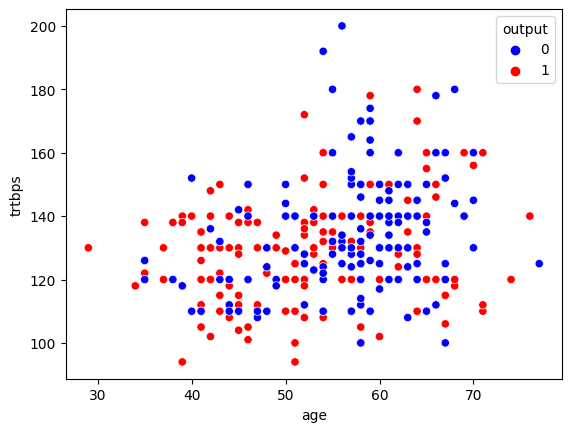

In [ ]:
sns.scatterplot(x='age', y='trtbps', data=df, hue='output', palette={0: 'blue', 1: 'red'})
plt.show()

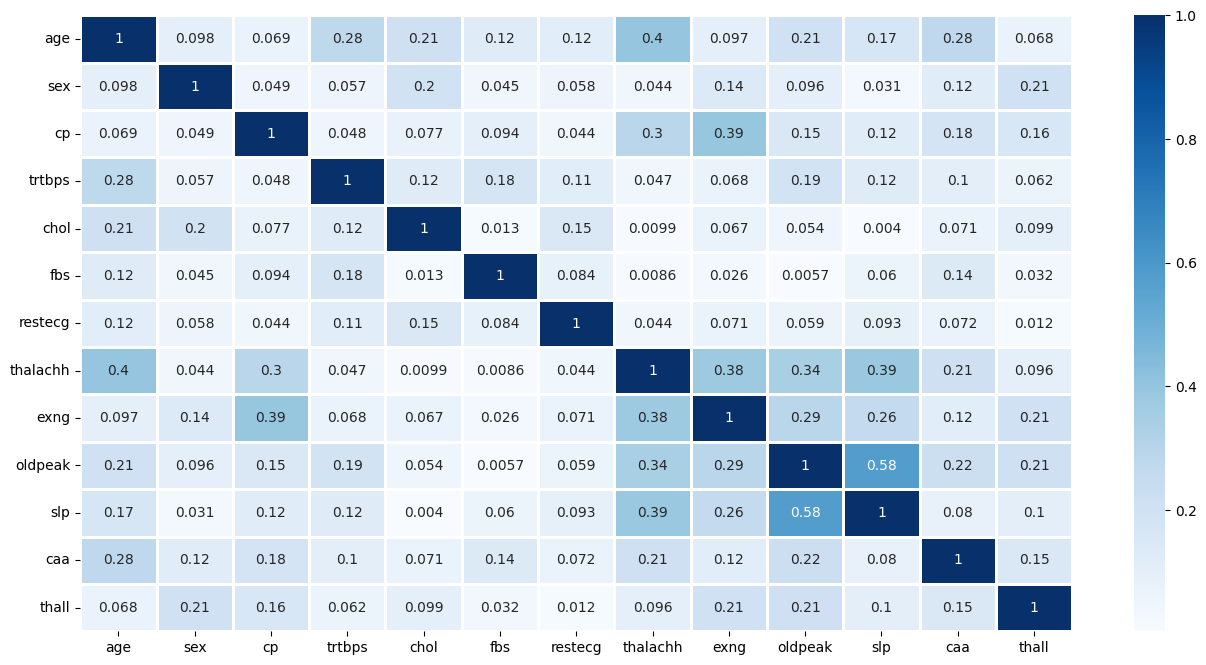

In [124]:
new_df=df.iloc[:,:13]
plt.figure(figsize=(16,8))
corr=new_df.corr()
sns.heatmap(abs(corr),lw=1,annot=True,cmap="Blues")
plt.show()

Raczej nie widać silnych korelacji.

<ipython-input-34-c33c8becc7d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'blue')
<ipython-input-34-c33c8becc7d5>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'blue')
<ipython-input-34-c33c8becc7d5>:6: Use

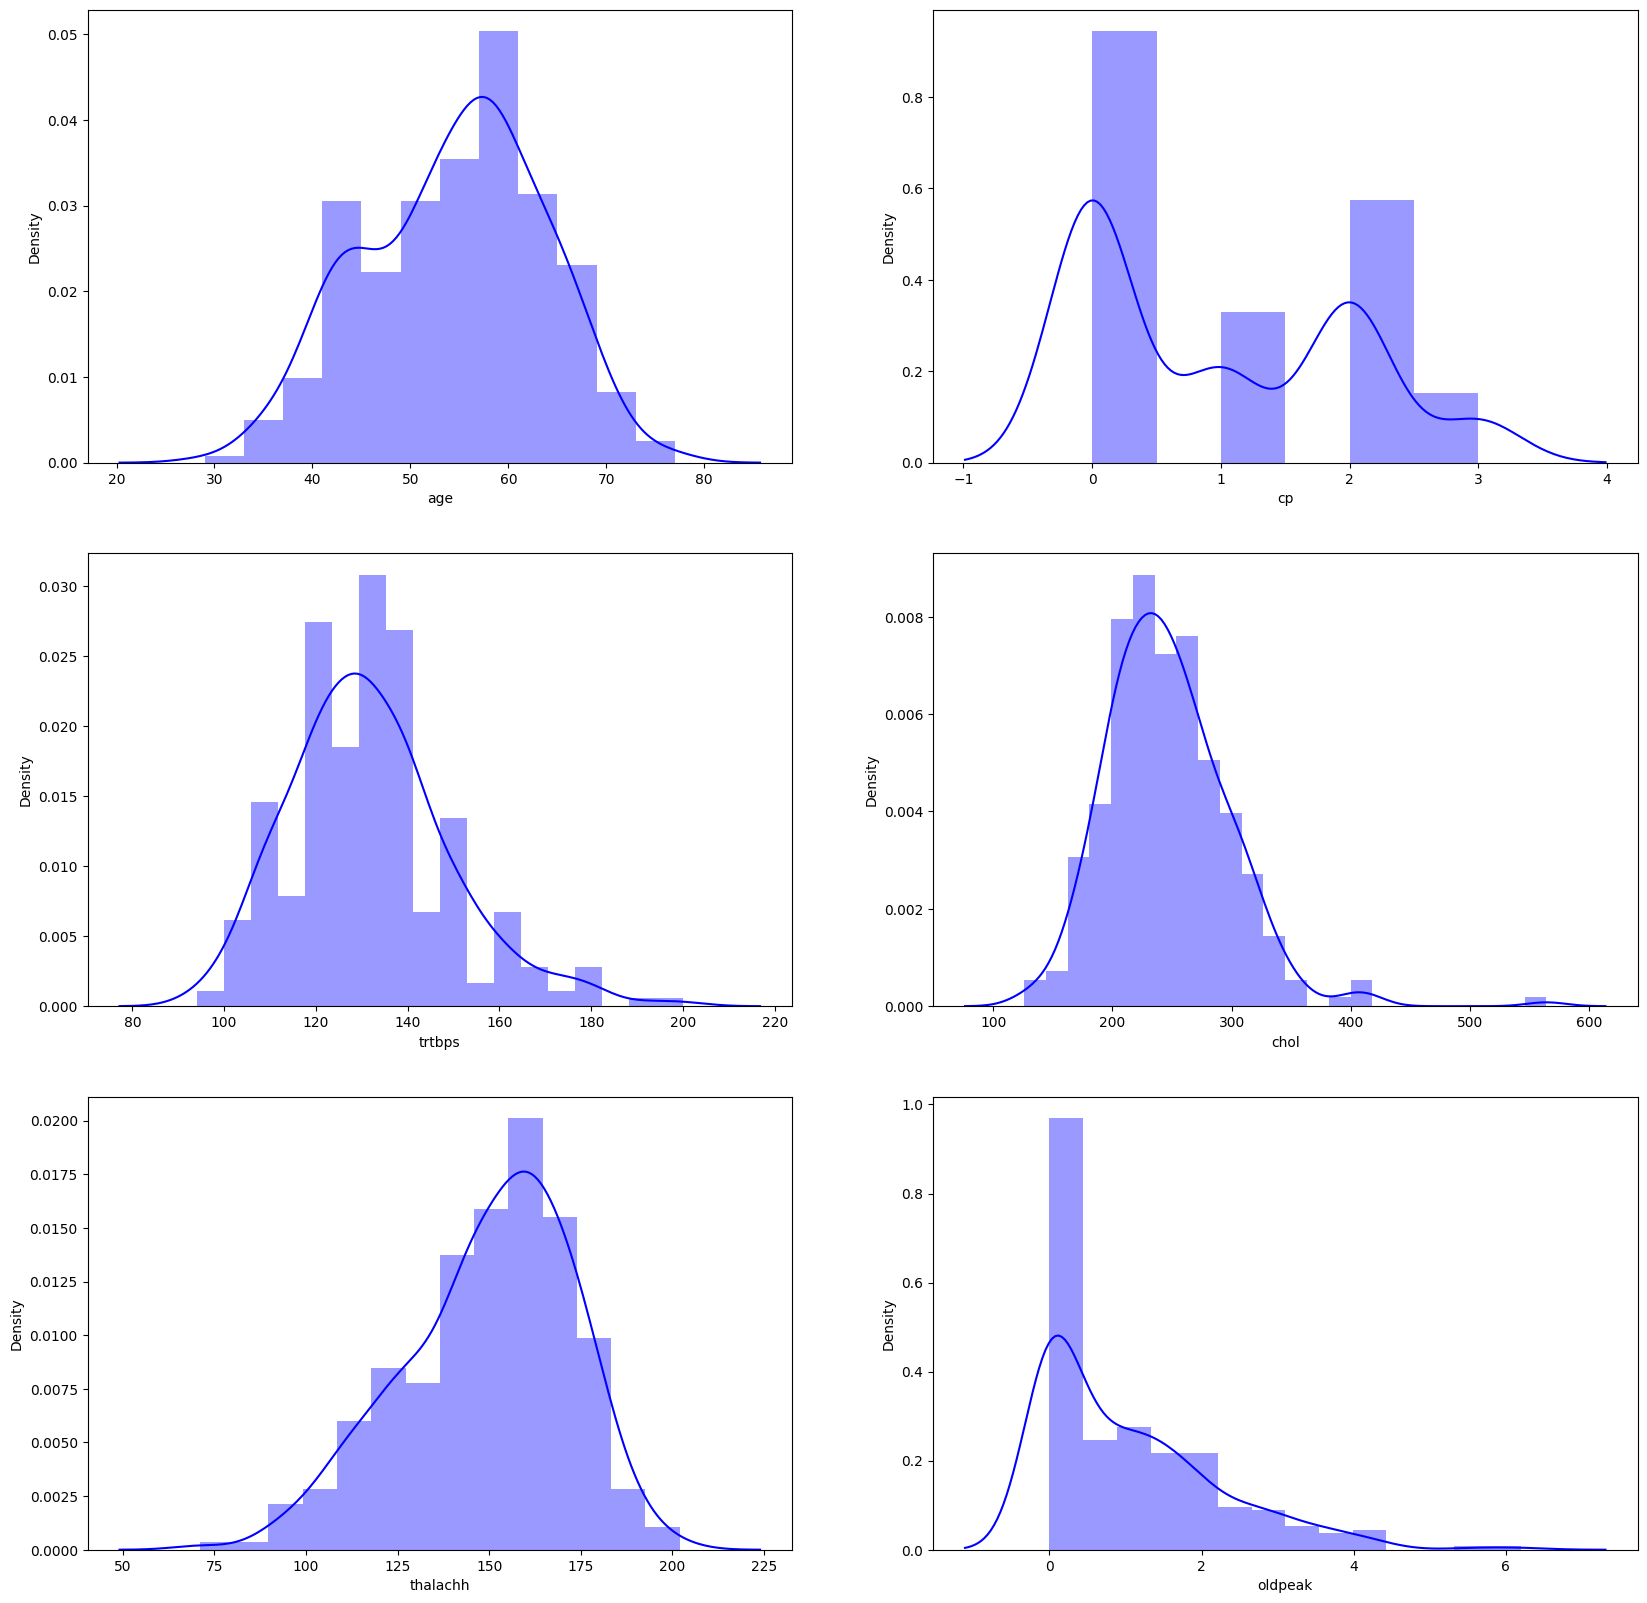

In [ ]:
columns=["age","cp","trtbps","chol","thalachh","oldpeak"]
fig, ax1 = plt.subplots(3,2, figsize=(20,20))
k = 0
for i in range(3):
    for j in range(2):
            sns.distplot(df[columns[k]], ax = ax1[i][j], color = 'blue')
            k += 1
plt.show()

In [125]:
df["age"]= np.log(df.age)
df["trtbps"]= np.log(df.trtbps)
df["chol"]= np.log(df.chol)
df["thalachh"]= np.log(df.thalachh)

Logarytmizacja danych by usnunąć wartości odstające.